**Ejercicios de Procesamiento digital de imagenes**

**Ejercicio 1: Espacios de Color**

**a) Cargar la imagen con OpenCV y mostrar los canales BGR por separado.**

In [1]:
# Cargo la imagen seleccionada desde Pixabay
!wget https://cdn.pixabay.com/photo/2016/05/20/16/45/lemons-1405452_640.jpg -O limonero.jpg

--2025-04-15 20:41:37--  https://cdn.pixabay.com/photo/2016/05/20/16/45/lemons-1405452_640.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.40.96, 172.64.147.160, 2606:4700:4400::6812:2860, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.40.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99701 (97K) [image/jpeg]
Saving to: ‘limonero.jpg’

limonero.jpg        100%[===================>]  97.36K  --.-KB/s    in 0.003s  

2025-04-15 20:41:37 (36.2 MB/s) - ‘limonero.jpg’ saved [99701/99701]



In [2]:
# Cargo la librería
import cv2
from google.colab.patches import cv2_imshow

Dimensiones de la imagen: (427, 640, 3)
Tipo de datos: uint8
Tamaño en memoria (bytes): 819840


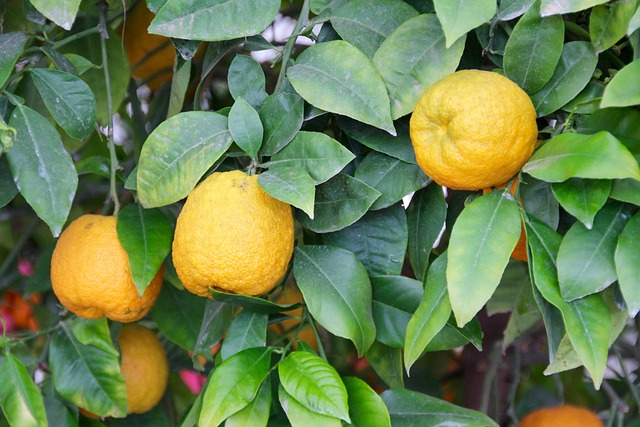

In [3]:
# Lectura de imagen usando OpenCV
imagen_bgr = cv2.imread('limonero.jpg')

# Información básica de la imagen
print("Dimensiones de la imagen:", imagen_bgr.shape)
print("Tipo de datos:", imagen_bgr.dtype)
print("Tamaño en memoria (bytes):", imagen_bgr.nbytes)

# Visualización de la imagen completa
cv2_imshow(imagen_bgr)

Estadísticas del canal Azul:
Valor mínimo: 0, Valor máximo: 255, Promedio: 79.46


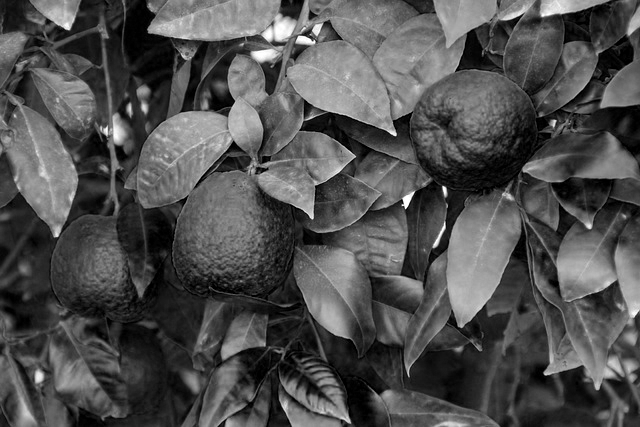

In [4]:
# Canal Azul (B)
B = imagen_bgr[:,:,0]
print("Estadísticas del canal Azul:")
print(f"Valor mínimo: {B.min()}, Valor máximo: {B.max()}, Promedio: {B.mean():.2f}")
cv2_imshow(B)


Estadísticas del canal Verde:
Valor mínimo: 0, Valor máximo: 255, Promedio: 127.15


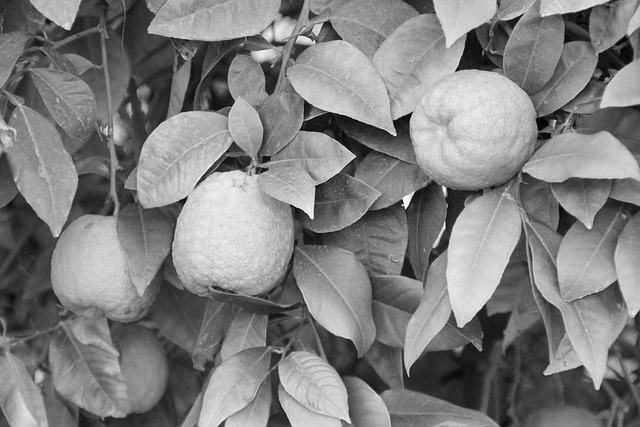

In [5]:
# Canal Verde (G)
G = imagen_bgr[:,:,1]
print("\nEstadísticas del canal Verde:")
print(f"Valor mínimo: {G.min()}, Valor máximo: {G.max()}, Promedio: {G.mean():.2f}")
cv2_imshow(G)


Estadísticas del canal Rojo:
Valor mínimo: 0, Valor máximo: 255, Promedio: 106.63


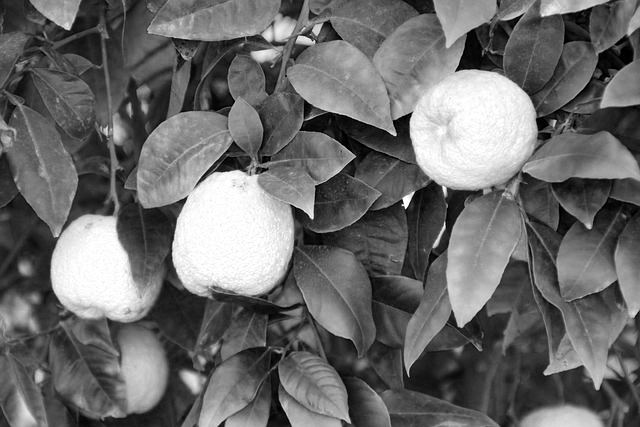

In [6]:
# Canal Rojo (R)
R = imagen_bgr[:,:,2]
print("\nEstadísticas del canal Rojo:")
print(f"Valor mínimo: {R.min()}, Valor máximo: {R.max()}, Promedio: {R.mean():.2f}")
cv2_imshow(R)

**b) Identificar cuál de los tres canales tiene mayor información basándose en los valores promedio.**

De acuerdo a lo observado, el canal verde es el que más información tiene, con un promedio de 127.5

**c) Convertir la imagen de BGR a RGB y explicar por qué los colores se ven diferentes antes y después de la conversión.**

In [7]:
# Demostración de conversión BGR a RGB
imagen_bgr = cv2.imread('limonero.jpg')
imagen_rgb = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB)

In [8]:
# Importo matplotlib
import matplotlib.pyplot as plt

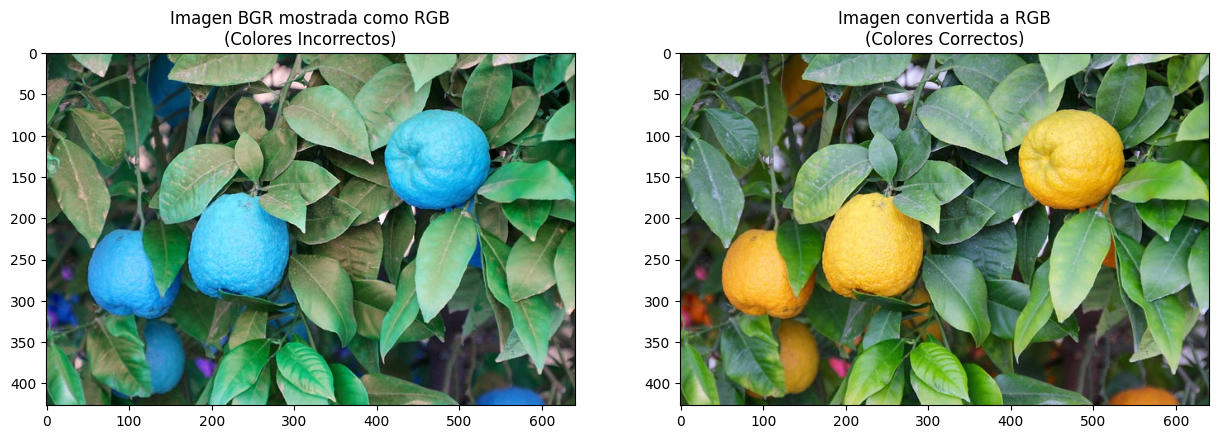

In [10]:
# Visualización comparativa
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))

ax1.imshow(imagen_bgr)
ax1.set_title('Imagen BGR mostrada como RGB\n(Colores Incorrectos)')

ax2.imshow(imagen_rgb)
ax2.set_title('Imagen convertida a RGB\n(Colores Correctos)')

plt.show()

Se ven diferentes porque OpenCV carga las imagenes en BGR, mientras que la mayoría de las bibliotecas de visualización en Python, como matplotlib, utilizan el formato estándar RGB

**Ejercicio 2: Muestreo y Cuantización**

**a) Aplicar muestreo espacial a una imagen con factores de 2, 4 y 8.**

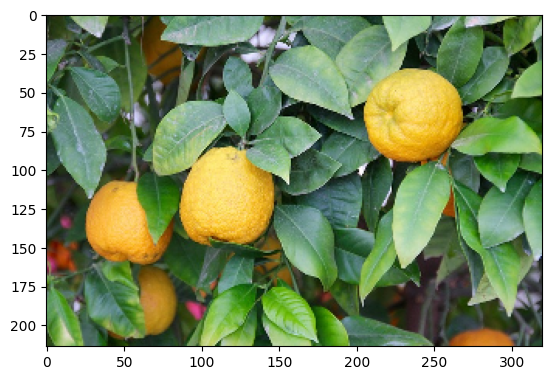

In [11]:
# Imagen con factor 2
imagen_factor_2 = imagen_rgb[::2, ::2]
plt.imshow(imagen_factor_2)

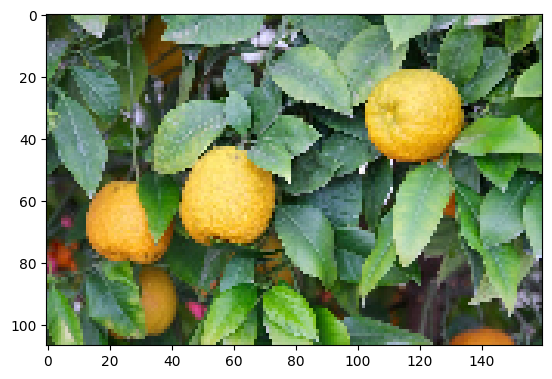

In [12]:
# Imagen con factor 4
imagen_factor_4 = imagen_rgb[::4, ::4]
plt.imshow(imagen_factor_4)

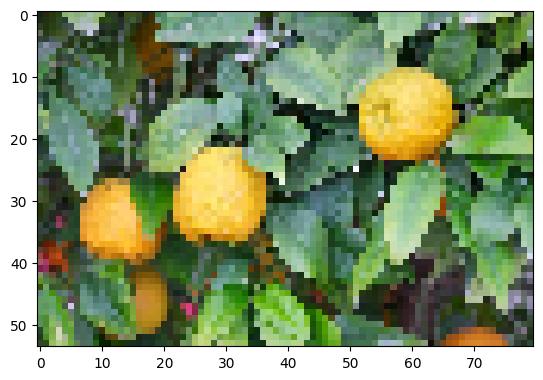

In [13]:
# Imagen con factor 8
imagen_factor_8 = imagen_rgb[::8, ::8]
plt.imshow(imagen_factor_8)

**b) Para cada caso, calcular:**


El nuevo tamaño de la imagen
El porcentaje de reducción de datos


In [17]:
# Calculo el tamaño de cada una
print("Tamaño de la imágen original: "+str(imagen_rgb.shape))
print("Tamaño de la imágen Factor 2: "+str(imagen_factor_2.shape))
print("Tamaño de la imágen Factor 4: "+str(imagen_factor_4.shape))
print("Tamaño de la imágen Factor 8: "+str(imagen_factor_8.shape))

Tamaño de la imágen original: (427, 640, 3)
Tamaño de la imágen Factor 2: (214, 320, 3)
Tamaño de la imágen Factor 4: (107, 160, 3)
Tamaño de la imágen Factor 8: (54, 80, 3)


In [20]:
# Calculo el total de pixeles de la imagen original
alto_original=imagen_rgb.shape[0]
ancho_original=imagen_rgb.shape[1]
original = alto_original * ancho_original
original

273280

In [21]:
# Calculo el total de pixel de la imagen factor 2
alto_factor2=imagen_factor_2.shape[0]
ancho_factor2=imagen_factor_2.shape[1]
factor2=alto_factor2*ancho_factor2
factor2


68480

In [23]:
# Calculo diferencia con la original
dif_factor2= original-factor2

# Aplico regla de 3 para calcular porcentaje
reduccion_factor2=dif_factor2 *100/ original

#imprimo resultado
print("El porcentaje de reduccion en factor 2 es del "+str(reduccion_factor2)+"%")

El porcentaje de reduccion en factor 2 es del 74.94145199063232%


In [24]:
# Calculo el total de pixeles de la imagen factor 4
alto_factor4=imagen_factor_4.shape[0]
ancho_factor4=imagen_factor_4.shape[1]
factor4=alto_factor4*ancho_factor4
factor4

17120

In [25]:
# Calculo diferencia con la original
dif_factor4= original-factor4

# Aplico regla de 3 para calcular porcentaje
reduccion_factor4=dif_factor4 *100/ original

#imprimo resultado
print("El porcentaje de reduccion en factor 4 es del "+str(reduccion_factor4)+"%")

El porcentaje de reduccion en factor 4 es del 93.73536299765809%


In [26]:
# Calculo el total de pixeles de la imagen factor 8
alto_factor8=imagen_factor_8.shape[0]
ancho_factor8=imagen_factor_8.shape[1]
factor8=alto_factor8*ancho_factor8
factor8

4320

In [28]:
# Calculo diferencia con la original
dif_factor8= original-factor8

# Aplico regla de 3 para calcular porcentaje
reduccion_factor8=dif_factor8 *100/ original

#imprimo resultado
print("El porcentaje de reduccion en factor 8 es del "+str(reduccion_factor8)+"%")

El porcentaje de reduccion en factor 8 es del 98.4192037470726%


**c) Aplicar cuantización con 4 niveles diferentes** (32, 64, 128, 256)

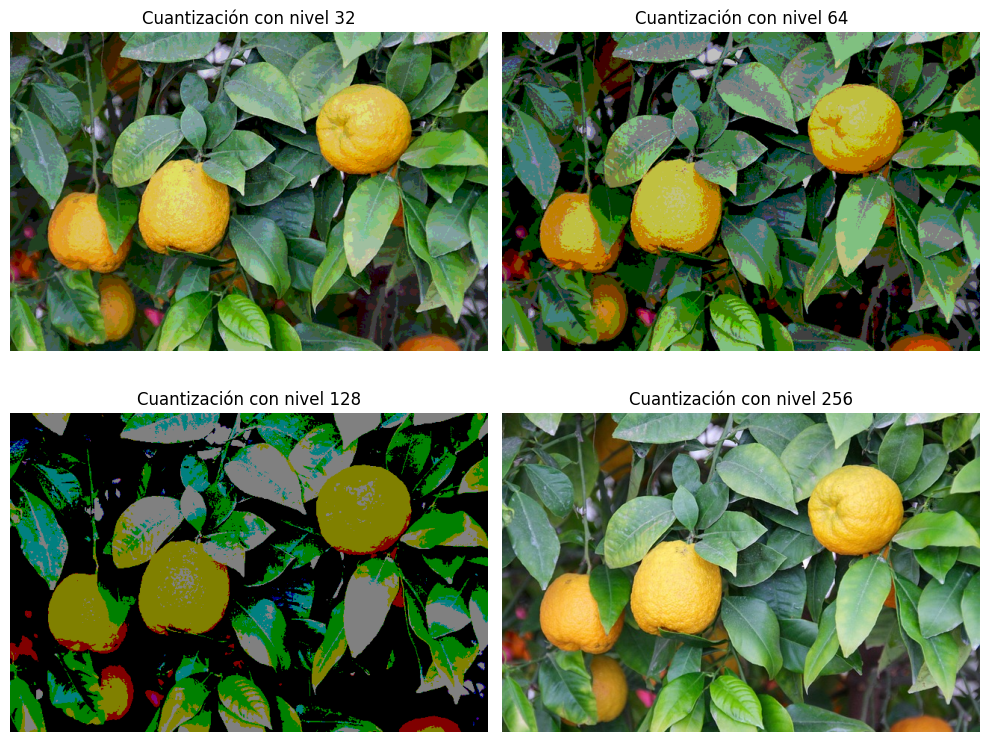

In [30]:
# Importo librería
import numpy as np

# Declaro una lista con los valores de cuantización
niveles = [32, 64, 128, 256]

# Preparamos una figura para mostrar las 4 imágenes cuantizadas
plt.figure(figsize=(10, 8))

# Iteramos sobre cada nivel de cuantización
for i, q in enumerate(niveles):

    # Verificamos si el nivel es 256, en ese caso no aplicamos ninguna transformación
    if q == 256:
        imagen_cuantizada = imagen_rgb.copy()  # No se modifica, ya está en su máxima calidad
    else:
        # Aplicamos la cuantización
        # Paso 1: Dividimos cada valor de píxel por el nivel (q)
        # Paso 2: Redondeamos hacia abajo con floor()
        # Paso 3: Multiplicamos de nuevo por q para obtener el valor cuantizado
        imagen_cuantizada = np.floor(imagen_rgb / q) * q

    # Convertimos los valores a enteros de 8 bits (valores entre 0 y 255)
    imagen_cuantizada = imagen_cuantizada.astype(np.uint8)

    # Mostramos la imagen en una de las posiciones del gráfico (subplots)
    plt.subplot(2, 2, i+1)                         # 2 filas, 2 columnas, posición i+1
    plt.imshow(imagen_cuantizada)                 # Mostramos la imagen cuantizada
    plt.title(f'Cuantización con nivel {q}')      # Título con el nivel
    plt.axis('off')                               # Ocultamos los ejes para que se vea más limpio

# Ajustamos el espacio entre imágenes y mostramos todo
plt.tight_layout()
plt.show()

**d) ¿En qué nivel de cuantización comienza a ser visible la degradación de la imagen?**

La degradación de la imagen comienza a ser visible a partir del nivel de cuantización 32, donde se pierden detalles de colores y se ven zonas más uniformes.

**Ejercicio 3: Segmentación por Color**

**Dada una imagen con objetos de diferentes colores:**

a) Implementar una segmentación para extraer objetos de un color específico usando umbrales en los canales RGB.

In [31]:
# Cargo la imagen seleccionada desde Pixabay
!wget https://cdn.pixabay.com/photo/2016/02/19/19/29/balloons-1211008_640.jpg -O globos.jpg

--2025-04-15 23:21:28--  https://cdn.pixabay.com/photo/2016/02/19/19/29/balloons-1211008_640.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.40.96, 172.64.147.160, 2606:4700:4400::ac40:93a0, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.40.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46939 (46K) [image/jpeg]
Saving to: ‘globos.jpg’

globos.jpg          100%[===================>]  45.84K  --.-KB/s    in 0.002s  

2025-04-15 23:21:28 (28.3 MB/s) - ‘globos.jpg’ saved [46939/46939]



array([[[253, 230, 182],
        [253, 230, 182],
        [254, 231, 183],
        ...,
        [254, 215, 141],
        [254, 215, 141],
        [254, 215, 141]],

       [[253, 230, 182],
        [253, 230, 182],
        [254, 231, 183],
        ...,
        [254, 215, 141],
        [254, 215, 141],
        [254, 215, 141]],

       [[253, 230, 182],
        [253, 230, 182],
        [253, 230, 182],
        ...,
        [255, 216, 142],
        [254, 215, 141],
        [254, 215, 141]],

       ...,

       [[253, 224, 163],
        [255, 226, 165],
        [255, 227, 166],
        ...,
        [254, 218, 148],
        [254, 218, 148],
        [253, 218, 145]],

       [[252, 222, 163],
        [254, 224, 165],
        [255, 225, 166],
        ...,
        [254, 218, 148],
        [254, 218, 148],
        [253, 218, 145]],

       [[251, 221, 162],
        [253, 223, 164],
        [254, 224, 165],
        ...,
        [255, 219, 149],
        [255, 219, 149],
        [255, 220, 147]]], dtype=uint8)
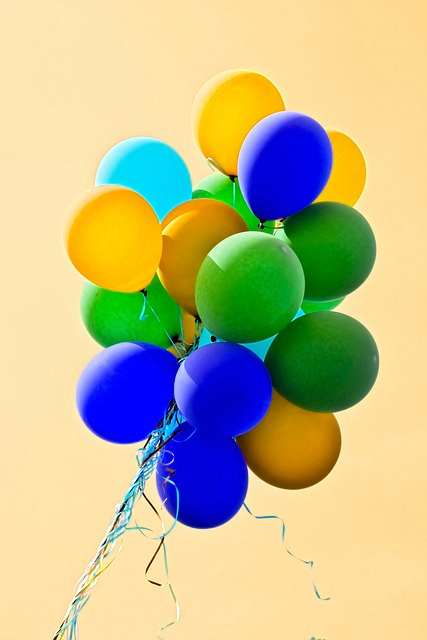

In [34]:
# visualizo la imagen
globos = cv2.imread('globos.jpg')
globos

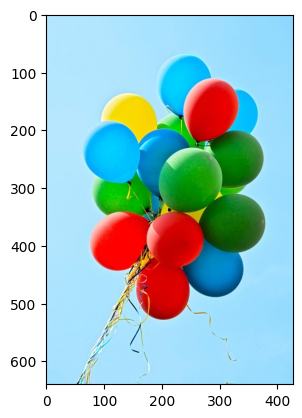

In [35]:
#convierto a rgb
globos_rgb = cv2.cvtColor(globos, cv2.COLOR_BGR2RGB)

#visualizo la imagen en matplotlib
plt.imshow(globos_rgb)

In [80]:
# Elijo un pixel y lo muestro
pixel_azul = globos_rgb[250, 110]


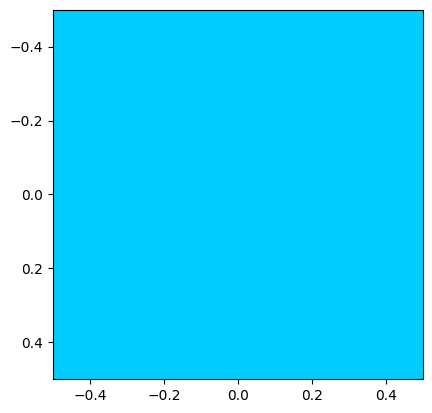

In [81]:
#Grafico con matplotlib
array_pixel_azul = np.array([[pixel_azul]], dtype=np.uint8)
plt.imshow(array_pixel_azul)

In [82]:
# Observo los tonos RGB del pixel
print(pixel_azul)

rojo_pixel_azul=print("Rojo: "+str(pixel_azul[0]))
verde_pixel_azul=print("Verde: "+str(pixel_azul[1]))
azul_pixel_azul=print("Azul: "+str(pixel_azul[2]))

[  0 204 255]
Rojo: 0
Verde: 204
Azul: 255


In [83]:
x = 50 #Probe 3 valores y fue el que más me gustó

rojo_del_pixel_azul = int(pixel_azul[0])
verde_del_pixel_azul = int(pixel_azul[1])
azul_del_pixel_azul = int(pixel_azul[2])

r_min, r_max = np.clip(rojo_del_pixel_azul - x, 0, 255), np.clip(rojo_del_pixel_azul + x, 0, 255)
g_min, g_max = np.clip(verde_del_pixel_azul - x, 0, 255), np.clip(verde_del_pixel_azul + x, 0, 255)
b_min, b_max = np.clip(azul_del_pixel_azul - x, 0, 255), np.clip(azul_del_pixel_azul + x, 0, 255)

print("Rangos definidos a partir del color amarillo del píxel y el valor x =", x)
print(f"Rojo:   entre {r_min} y {r_max}")
print(f"Verde:  entre {g_min} y {g_max}")
print(f"Azul:   entre {b_min} y {b_max}")

Rangos definidos a partir del color amarillo del píxel y el valor x = 50
Rojo:   entre 0 y 50
Verde:  entre 154 y 254
Azul:   entre 205 y 255


In [84]:
# Separo los 3 canales
R = globos_rgb[:, :, 0]
G = globos_rgb[:, :, 1]
B = globos_rgb[:, :, 2]

# Creo una máscara donde se cumplan las tres condiciones a la vez
mascara = (R >= r_min) & (R <= r_max) & \
          (G >= g_min) & (G <= g_max) & \
          (B >= b_min) & (B <= b_max)

# Convertimos la máscara a uint8 para mostrarla
mascara_binaria = np.uint8(mascara) * 255  # 1 → 255 (blanco), 0 → 0 (negro)

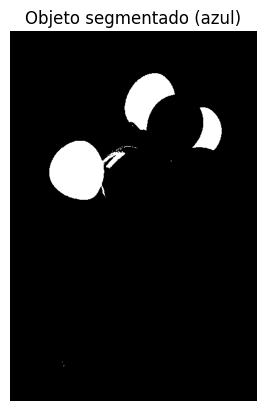

In [85]:
#imprimo la imagen binaria creada
plt.imshow(mascara_binaria, cmap='gray')
plt.title("Objeto segmentado (azul)")
plt.axis('off')
plt.show()

Se observan los globos con ese tono de azul


b) Calcular y mostrar el histograma de la imagen en escala de grises.

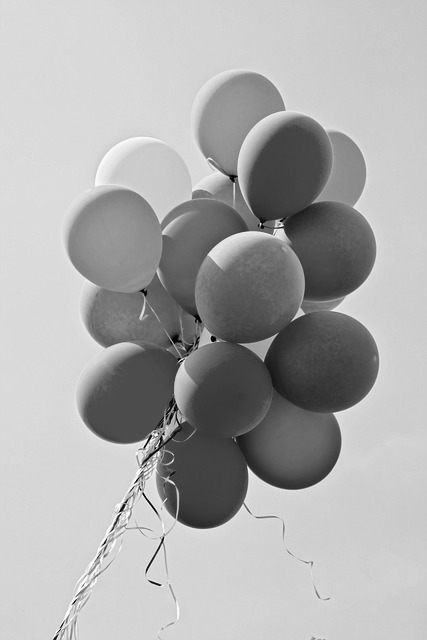

In [86]:
# Convierto la imagen a escala de grises
globos_rgb = cv2.cvtColor(globos, cv2.COLOR_BGR2RGB)

gobos_gris = cv2.cvtColor(globos_rgb, cv2.COLOR_RGB2GRAY)

cv2_imshow(gobos_gris)

In [87]:
# Calculo el histograma con OpenCV
histograma = cv2.calcHist([globos_gris], [0], None, [256], [0, 256])

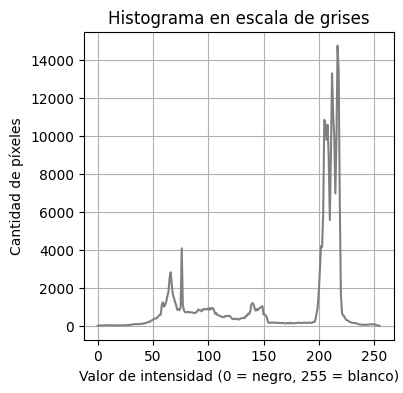

In [88]:
# Muestro el histograma con matplotlib
plt.figure(figsize=(4, 4))
plt.plot(histograma, color='gray')
plt.title('Histograma en escala de grises')
plt.xlabel('Valor de intensidad (0 = negro, 255 = blanco)')
plt.ylabel('Cantidad de píxeles')
plt.grid(True)
plt.show()


c) Encontrar las coordenadas del rectángulo que encierra el objeto segmentado.

array([[[182, 230, 253],
        [182, 230, 253],
        [183, 231, 254],
        ...,
        [141, 215, 254],
        [141, 215, 254],
        [141, 215, 254]],

       [[182, 230, 253],
        [182, 230, 253],
        [183, 231, 254],
        ...,
        [141, 215, 254],
        [141, 215, 254],
        [141, 215, 254]],

       [[182, 230, 253],
        [182, 230, 253],
        [182, 230, 253],
        ...,
        [142, 216, 255],
        [141, 215, 254],
        [141, 215, 254]],

       ...,

       [[163, 224, 253],
        [165, 226, 255],
        [166, 227, 255],
        ...,
        [148, 218, 254],
        [148, 218, 254],
        [145, 218, 253]],

       [[163, 222, 252],
        [165, 224, 254],
        [166, 225, 255],
        ...,
        [148, 218, 254],
        [148, 218, 254],
        [145, 218, 253]],

       [[162, 221, 251],
        [164, 223, 253],
        [165, 224, 254],
        ...,
        [149, 219, 255],
        [149, 219, 255],
        [147, 220, 255]]], dtype=uint8)
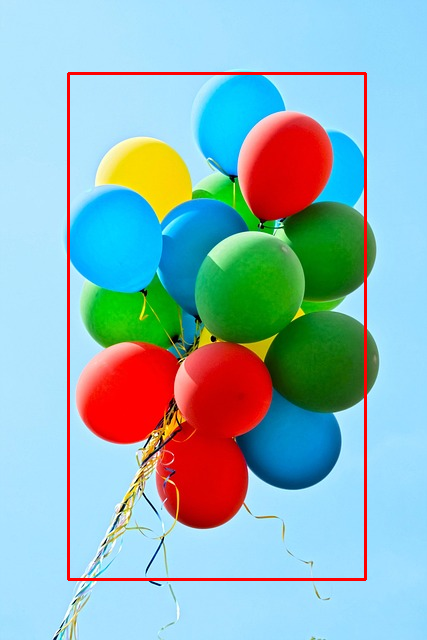

In [89]:
# Recorro la imagen para encontrar las filas y columnas donde hay píxeles blancos (valor 255)
filas, columnas = np.where(mascara_binaria == 255)

# Obtener los límites del objeto
fila_min = np.min(filas)
fila_max = np.max(filas)
col_min = np.min(columnas)
col_max = np.max(columnas)

# Dibujar el rectángulo sobre una copia de la imagen original
imagen_con_rectangulo = globos_rgb.copy()
cv2.rectangle(imagen_con_rectangulo, (col_min, fila_min), (col_max, fila_max), color=(255, 0, 0), thickness=2)

d) Dibujar los bordes del objeto segmentado en color rojo.

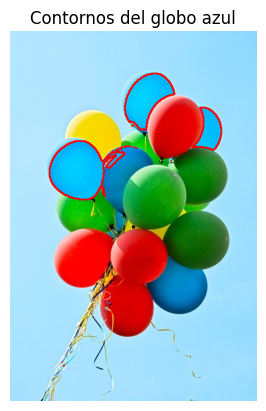

In [94]:
# Paso 1: encontrar los contornos en la máscara
contornos, _ = cv2.findContours(mascara_binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Paso 2: copiar la imagen original para no modificarla
globos_rgb_bordes = globos_rgb.copy()  # Asegurate de que esté en RGB

# Paso 3: dibujar los contornos sobre la imagen
cv2.drawContours(globos_rgb_bordes, contornos, -1, color=(255, 0, 0), thickness=2)  # rojo

# Paso 4: mostrar la imagen con bordes
plt.imshow(globos_rgb_bordes)
plt.title("Contornos del globo azul")
plt.axis('off')
plt.show()

Observo que generó contoro sobre los globos con ese azul